In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("../../data/raw/crime.csv", encoding='unicode_escape')
df
#loading the dataset to ensure it works

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [3]:
import matplotlib.pylab as plt
import seaborn as sns
#checking the numbers of rows and columns in the dataset and the column labels
print("Number of rows and columns respectively:", df.shape)
print("Columns in the dataset:", df.columns)

Number of rows and columns respectively: (319073, 17)
Columns in the dataset: Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')


In [4]:
df.describe(include='object').T

#This describes the characteristics of the data; some useful characteristics that are gathered are:
#OFFENSE_CODE_GROUP: there are 67 different groups, with Motor Vehicle Accident Response being the most common offense group.
#OFFENSE_DESCRIPTION: there are 244 unique descriptions, with Sick/Injured/Medical Person being the most common descrpition.
#DISTRICT: there are 12 different districts within the area of Boston, with the district B2 having the highest crime rate.
#OCCURRED_ON_DATE: the date on which the most crimes were reported in Boston between June 2015 - Sept 2018 was June 1, 2017.
#DAY_OF_WEEK: Friday is a weekday on which the most crimes are reported.
#STREET: there are 4657 streets in Boston, with Washington St being the location with the highest crime rate.


,count,unique,top,freq
INCIDENT_NUMBER,319073,282517,I162030584,13
OFFENSE_CODE_GROUP,319073,67,Motor Vehicle Accident Response,37132
OFFENSE_DESCRIPTION,319073,244,SICK/INJURED/MEDICAL - PERSON,18783
DISTRICT,317308,12,B2,49945
REPORTING_AREA,319073,879,,20250
SHOOTING,1019,1,Y,1019
OCCURRED_ON_DATE,319073,233229,2017-06-01 00:00:00,29
DAY_OF_WEEK,319073,7,Friday,48495
UCR_PART,318983,4,Part Three,158553
STREET,308202,4657,WASHINGTON ST,14194


In [5]:
#minimizing the number of columns and only keeping the count of crime, offense code group, offense description, district, street, and location.
#this is done by dropping the unwanted columns from the dataset
#this dataset will help me answer one of my questions by finding patterns from crime incidents and linkages between them with other determinants such as socioeconomic factors.
df1=df
df1.drop(columns = ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE' , 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'Lat', 'Long'])

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,STREET,Location
0,Larceny,LARCENY ALL OTHERS,D14,LINCOLN ST,"(42.35779134, -71.13937053)"
1,Vandalism,VANDALISM,C11,HECLA ST,"(42.30682138, -71.06030035)"
2,Towed,TOWED MOTOR VEHICLE,D4,CAZENOVE ST,"(42.34658879, -71.07242943)"
3,Investigate Property,INVESTIGATE PROPERTY,D4,NEWCOMB ST,"(42.33418175, -71.07866441)"
4,Investigate Property,INVESTIGATE PROPERTY,B3,DELHI ST,"(42.27536542, -71.09036101)"
...,...,...,...,...,...
319068,Warrant Arrests,WARRANT ARREST,D4,COVENTRY ST,"(42.33695098, -71.08574813)"
319069,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,RIVER ST,"(42.25592648, -71.12317207)"
319070,Warrant Arrests,WARRANT ARREST,E18,RIVER ST,"(42.25592648, -71.12317207)"
319071,Warrant Arrests,WARRANT ARREST,E13,NEW WASHINGTON ST,"(42.30233307, -71.11156487)"


In [6]:
#minimizing the number of columns and only keeping the count of crime, offense code group, offense description, year, month, day of week, and hour.
#this is done by dropping the unwanted columns from the dataset
#this dataset will help me answer one of my questions regarding the occurance of a specific major event, such as an election, impact the city's crime rate?
df2=df
df2.drop(columns = ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'UCR_PART', 'Lat', 'Long', 'Location', 'STREET', 'DISTRICT'])

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,YEAR,MONTH,DAY_OF_WEEK,HOUR
0,Larceny,LARCENY ALL OTHERS,2018,9,Sunday,13
1,Vandalism,VANDALISM,2018,8,Tuesday,0
2,Towed,TOWED MOTOR VEHICLE,2018,9,Monday,19
3,Investigate Property,INVESTIGATE PROPERTY,2018,9,Monday,21
4,Investigate Property,INVESTIGATE PROPERTY,2018,9,Monday,21
...,...,...,...,...,...,...
319068,Warrant Arrests,WARRANT ARREST,2016,6,Sunday,17
319069,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",2015,7,Thursday,13
319070,Warrant Arrests,WARRANT ARREST,2015,7,Thursday,13
319071,Warrant Arrests,WARRANT ARREST,2016,5,Tuesday,19


In [7]:
sns.set_theme(style="ticks",
              font_scale=1.3, # this scales the fonts slightly higher
             )
#removing the top and right axis lines
plt.rc("axes.spines", top=False, right=False)

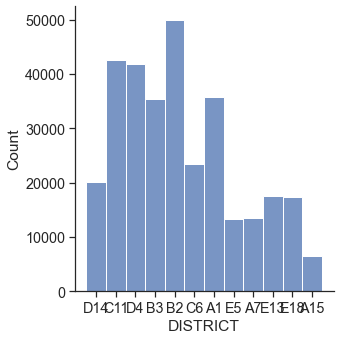

In [8]:
#the graph will help me with my first question, as I can look up the vaule of properties in the district and the average family income to see if there is any economic relation.
sns.displot(df1['DISTRICT'], kde=False, bins=319073)

<AxesSubplot:title={'center':'Crime Rate In Boston per Month'}, xlabel='Month', ylabel='Year'>

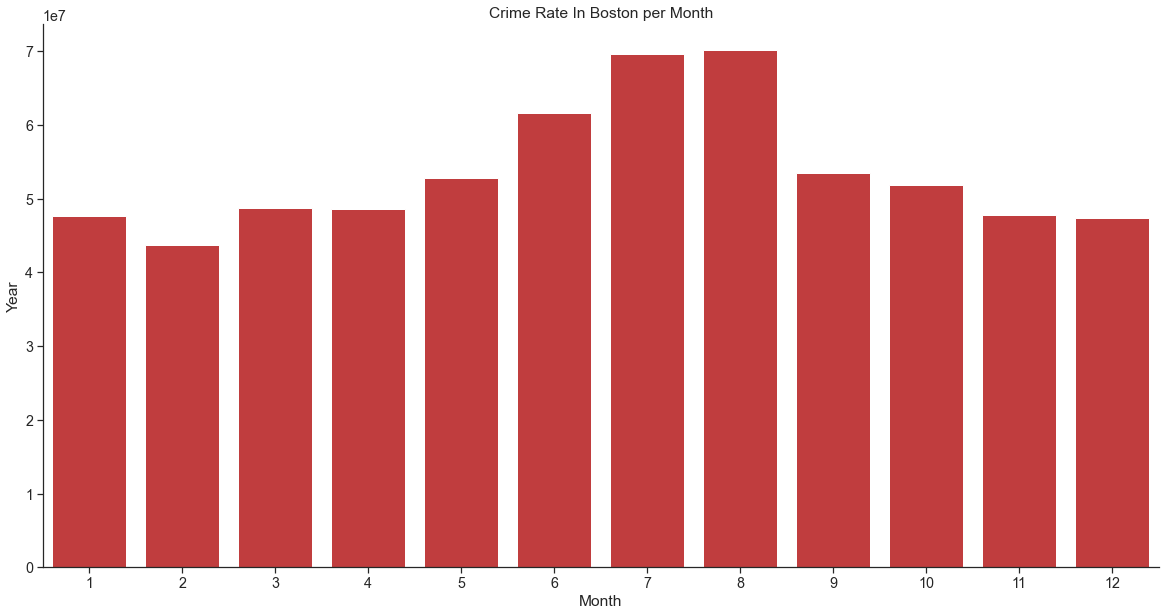

In [16]:
#this graph will help me with my second question, as I can analyize the year and month were the greatest crime rates were recorded.
df2a = df2.groupby('MONTH', as_index=False).sum()

a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x="MONTH", y="YEAR", data=df2a, color="tab:red")
ax.set_title("Crime Rate In Boston per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Year")
ax

<AxesSubplot:title={'center':'Crime Rates During the Week'}, xlabel='Number of Crimes Reported', ylabel='Day of Week'>

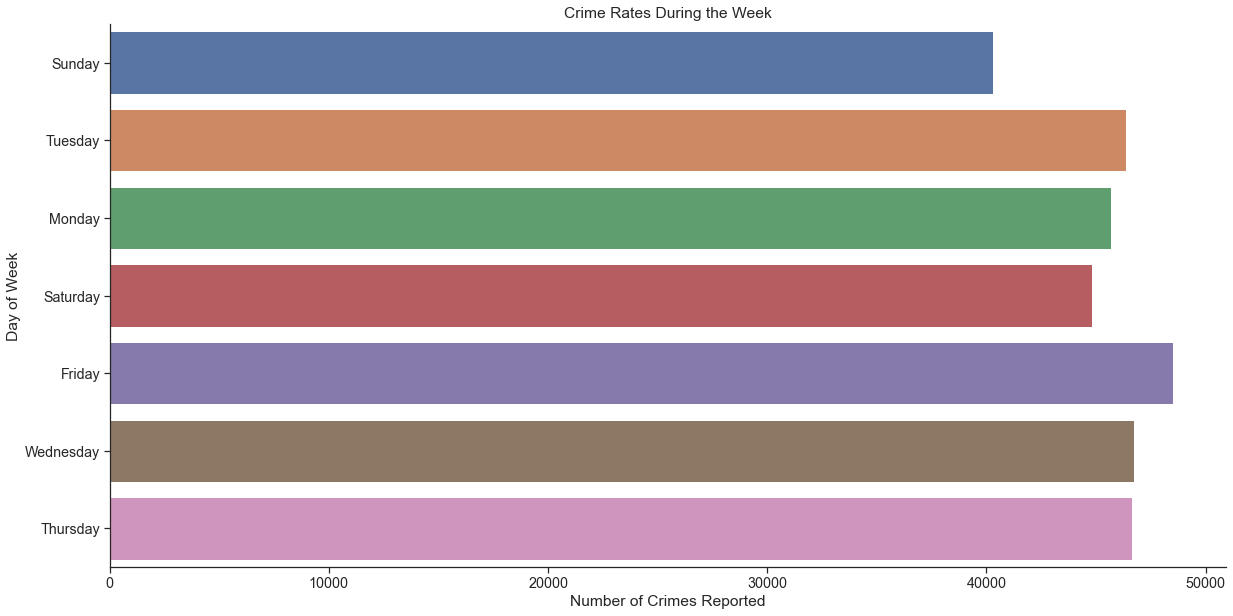

In [12]:
#this graph will help me with both of my questions, as knowing when crime may occur can implement preventative measurses, such as more police presence during Fridays.
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(y ='DAY_OF_WEEK' ,data = df2)
ax.set_title("Crime Rates During the Week")
ax.set_xlabel("Number of Crimes Reported")
ax.set_ylabel("Day of Week")
ax

<AxesSubplot:xlabel='HOUR', ylabel='Density'>

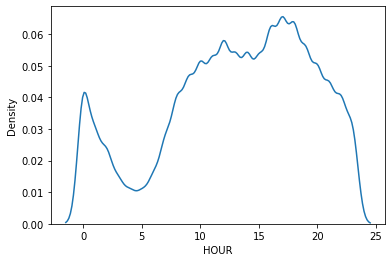

In [35]:
#this graph will help with both of my questions, as knowing when crime may occur during the day can implement preventative measurses, such as more police presence during the late evenings.
a4_dims = (20, 10)
sns.kdeplot(df2['HOUR'])

In [17]:
df1.to_csv(path_or_buf = '/Users/sophiebetivoiu/DATA301/project-group42-project/data/processed/Sophie_df1_pro.csv')

In [18]:
df2.to_csv(path_or_buf = '/Users/sophiebetivoiu/DATA301/project-group42-project/data/processed/Sophie_df2_pro.csv')